### b) Write a colab pytorch from scratch - 3 layer deep neural network for non linear regression withotu using pytorch builtin layer functionality

**Hint:** https://docs.google.com/presentation/d/13Oo5gXwcsoq9oMC4XriAyxkvgicatBxfI4cZzDhRyiE/edit#slide=id.g826a355833_0_525Links to an external site.



**Hint:**

https://colab.research.google.com/drive/1HS3qbHArkqFlImT2KnF5pcMCz7ueHNvY?usp=sharing&authuser=1#scrollTo=EGkS6nN6dQaz

# Setup

In [1]:
%pip install torch
%pip install numpy
%pip install matplotlib

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic data
np.random.seed(0)
x = np.random.rand(100, 1)
y = 1 + 2 * x + 0.3 * x**2 + 0.1 * x**3 + np.random.randn(100, 1) * 0.1

x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [4]:
# Custom layers and model definition
class CustomLinear:
    def __init__(self, input_dim, output_dim):
        self.weights = torch.randn(input_dim, output_dim, requires_grad=True)
        self.bias = torch.randn(output_dim, requires_grad=True)

    def forward(self, x):
        return x @ self.weights + self.bias

class CustomReLU:
    def forward(self, x):
        return x.clamp_min(0.0)

class CustomModel:
    def __init__(self):
        self.layer1 = CustomLinear(1, 10)
        self.relu1 = CustomReLU()
        self.layer2 = CustomLinear(10, 10)
        self.relu2 = CustomReLU()
        self.layer3 = CustomLinear(10, 1)

    def forward(self, x):
        x = self.layer1.forward(x)
        x = self.relu1.forward(x)
        x = self.layer2.forward(x)
        x = self.relu2.forward(x)
        x = self.layer3.forward(x)
        return x

model = CustomModel()

In [5]:
# Mean squared error for loss calculation
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

# Training function
def train(model, x, y, epochs, learning_rate):
    optimizer = torch.optim.SGD([model.layer1.weights, model.layer1.bias,
                                 model.layer2.weights, model.layer2.bias,
                                 model.layer3.weights, model.layer3.bias],
                                lr=learning_rate)

    for epoch in range(epochs):
        model.layer1.weights.requires_grad_(True)
        model.layer1.bias.requires_grad_(True)
        model.layer2.weights.requires_grad_(True)
        model.layer2.bias.requires_grad_(True)
        model.layer3.weights.requires_grad_(True)
        model.layer3.bias.requires_grad_(True)

        # Forward pass
        y_pred = model.forward(x)

        # Compute Loss
        loss = mean_squared_error(y_pred, y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

The train() function is defined to handle the training loop. It iterates over the dataset for a specified number of epochs, performs forward and backward propagation, and updates the model parameters using an optimizer.

In [6]:
# Train the model
train(model, x_tensor, y_tensor, epochs=100, learning_rate=0.01)

Epoch 0, Loss: 60.08492660522461
Epoch 10, Loss: 1.9742457866668701
Epoch 20, Loss: 1.4736369848251343
Epoch 30, Loss: 1.1456981897354126
Epoch 40, Loss: 0.9195864200592041
Epoch 50, Loss: 0.7551865577697754
Epoch 60, Loss: 0.6304196715354919
Epoch 70, Loss: 0.5360883474349976
Epoch 80, Loss: 0.4638589918613434
Epoch 90, Loss: 0.40684136748313904


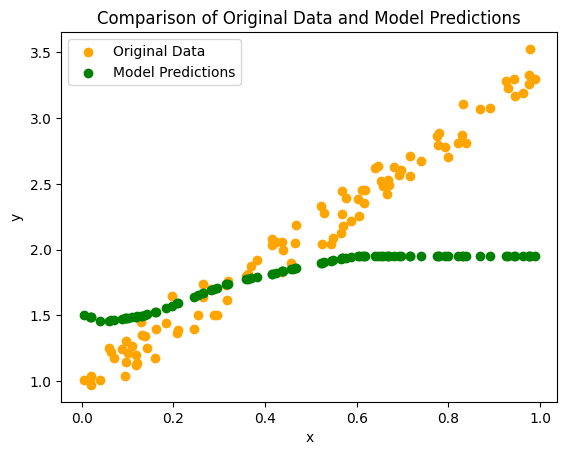

In [11]:
# Generate predictions from the model
with torch.no_grad():
    predictions = model.forward(x_tensor).numpy()

# Plotting the original data and the model's predictions
plt.scatter(x, y, label='Original Data', color='orange')
plt.scatter(x, predictions, label='Model Predictions', color='green')
plt.title('Comparison of Original Data and Model Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()